In [1]:
import numpy as np
from src.GEF import GEF as GEFNew
from src.GEFClassic.GEFClassic import GEF as GEFOld
from Models.Classic import UpdateVals, TimeStep, Initialise
from scipy.integrate import solve_ivp
from src.Tools.timer import Timer
from src.SolverFunctions.WhittakerFuncs import WhittakerApprox
import matplotlib.pyplot as plt

In [2]:
#common parameters
beta = 25
m = 6.16e-6
phi = 15.55
dphi = -np.sqrt(2/3)*m
V = lambda x: 1/2*m**2*x**2
dV = lambda x: m**2*x

ntr = 90
tend = 223.5#223.5
atol = 1e-20
rtol = 1e-6

In [3]:
#Run Old GEF version:
GO = GEFOld(beta, {"phi":phi, "dphi":dphi}, V, dV)
GO.ntr = ntr+1
solOld = GO.RunGEF(ntr, tend=tend, printstats=True, reachNend=False, atol=atol, rtol=rtol)


The solver aims at reaching t=223.5
Attempting run with ntr=91


KeyboardInterrupt: 

In [ ]:
GN = GEFNew("Classic", beta, {"phi":phi, "dphi":dphi}, {"V":V, "dV":dV})

def ode(t, y, vals, atol, rtol):
    UpdateVals(t, y, vals)
    dydt = TimeStep(t, y, vals, atol=atol, rtol=rtol)
    return dydt

yini, vals = Initialise(GN, ntr)

t = Timer()
t.start()

def EndOfInflation(t, y, vals, atol, rtol):
        dphi = y[2]
        V = vals.V(vals.phi)
        rhoEB = 0.5*(y[4]+y[5])*vals.H0**2*np.exp(4*(y[3]-y[0]))
        val = np.log(abs((dphi**2 + rhoEB)/V))
        return val

setattr(EndOfInflation, "terminal", True)
setattr(EndOfInflation, "direction", 1)
events = []#[EndOfInflation] 

solNew = solve_ivp(ode, [0., tend], yini, method="RK45", events=events, args=(vals, atol, rtol), atol=atol, rtol=rtol)
t.stop()

/home/richard/Documents/Phd Muenster/Axions in the early Universe/GEF/src/GEF.py:157: UserWarning: No default value set for 'kh'
  warnings.warn(f"No default value set for '{key}'")


8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8


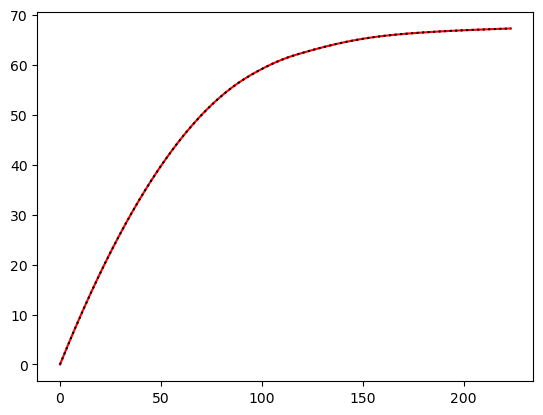

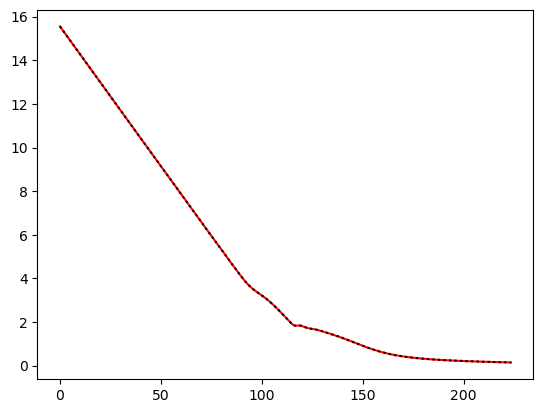

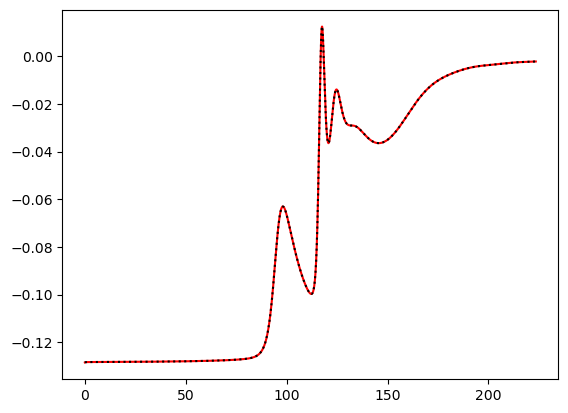

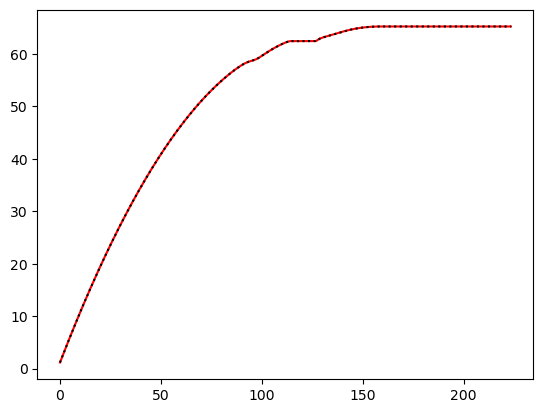

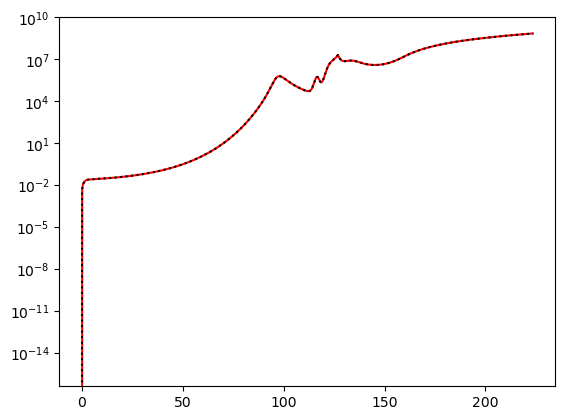

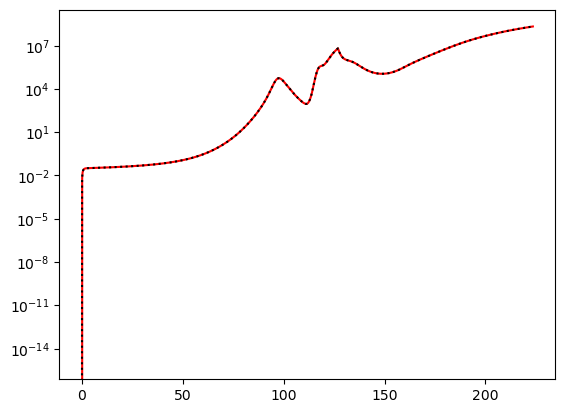

/tmp/ipykernel_14000/335307971.py:8: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


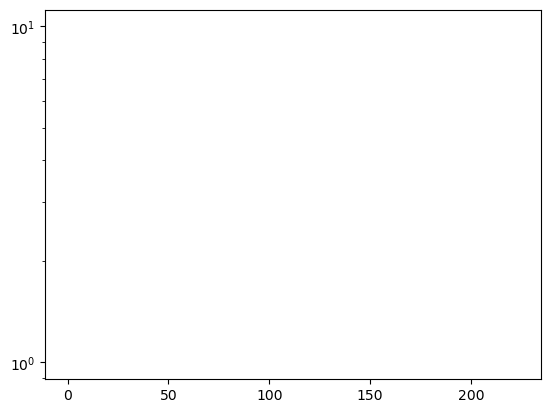

In [ ]:
for i in range(4):
    plt.plot(solOld.t, solOld.y[i,:], "r")
    plt.plot(solNew.t, solNew.y[i,:], "k:")
    plt.show()
for i in range(4,7):
    plt.plot(solOld.t, abs(solOld.y[i,:]), "r")
    plt.plot(solNew.t, abs(solNew.y[i,:]), "k:")
    plt.yscale("log")
    plt.show()